In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('wiki_movie_plots_deduped_cleaned_genre_and_plot.csv')
df

Release Year                             Title Origin/Ethnicity  \
0              1901            Kansas Saloon Smashers         American   
1              1901     Love by the Light of the Moon         American   
2              1901           The Martyred Presidents         American   
3              1901  Terrible Teddy, the Grizzly King         American   
4              1902            Jack and the Beanstalk         American   
...             ...                               ...              ...   
41656          2014                 The Water Diviner          Turkish   
41657          2017                Çalgı Çengi İkimiz          Turkish   
41658          2017                      Olanlar Oldu          Turkish   
41659          2017                  Non-Transferable          Turkish   
41660          2017                İstanbul Kırmızısı          Turkish   

                                 Director  \
0                                 Unknown   
1                                 Unknown   
2                                 Unknown   
3                                 Unknown   
4      George S. Fleming, Edwin S. Porter   
...                                   ...   
41656             Director: Russell Crowe   
41657                      Selçuk Aydemir   
41658                         Hakan Algül   
41659                     Brendan Bradley   
41660                      Ferzan Özpetek   

                                                    Cast            Genre  \
0                                                    NaN              NaN   
1                                                    NaN              NaN   
2                                                    NaN              NaN   
3                                                    NaN              NaN   
4                                                    NaN              NaN   
...                                                  ...              ...   
41656  Director: Russell Crowe\r\nCast: Russell Crowe...              NaN   
41657                          Ahmet Kural, Murat Cemcir           comedy   
41658              Ata Demirer, Tuvana Türkay, Ülkü Duru           comedy   
41659  YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...  romantic comedy   
41660  Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, ...         romantic   

      Genre_updated                                          Wiki Page  \
0               NaN  https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...   
1               NaN  https://en.wikipedia.org/wiki/Love_by_the_Ligh...   
2               NaN  https://en.wikipedia.org/wiki/The_Martyred_Pre...   
3               NaN  https://en.wikipedia.org/wiki/Terrible_Teddy,_...   
4               NaN  https://en.wikipedia.org/wiki/Jack_and_the_Bea...   
...             ...                                                ...   
41656           NaN    https://en.wikipedia.org/wiki/The_Water_Diviner   
41657        comedy  https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...   
41658        comedy         https://en.wikipedia.org/wiki/Olanlar_Oldu   
41659        comedy  https://en.wikipedia.org/wiki/Non-Transferable...   
41660       romance  https://en.wikipedia.org/wiki/%C4%B0stanbul_K%...   

                                                    Plot  \
0      A bartender is working at a saloon, serving dr...   
1      The moon, painted with a smiling face hangs ov...   
2      The film, just over a minute long, is composed...   
3      Lasting just 61 seconds and consisting of two ...   
4      The earliest known adaptation of the classic f...   
...                                                  ...   
41656  The film begins in 1919, just after World War ...   
41657  Two musicians, Salih and Gürkan, described the...   
41658  Zafer, a sailor living with his mother Döndü i...   
41659  The film centres around a young woman named Am...   
41660  The writer Orhan Şahin returns to İstanbul aft...   

                                          

In [4]:
from collections import Counter


In [5]:
Counter(" ".join(df[df['Genre_updated']=='romance']['Plot_cleanned']).split()).most_common(500)

[('love', 3718),
 ('get', 2302),
 ('father', 2026),
 ('go', 1884),
 ('friend', 1853),
 ('life', 1719),
 ('tell', 1718),
 ('find', 1620),
 ('one', 1598),
 ('meet', 1582),
 ('family', 1499),
 ('day', 1496),
 ('take', 1443),
 ('come', 1439),
 ('time', 1250),
 ('back', 1221),
 ('mother', 1154),
 ('fall', 1103),
 ('also', 1096),
 ('two', 1072),
 ('see', 1064),
 ('make', 1047),
 ('girl', 1021),
 ('later', 1002),
 ('home', 991),
 ('marriage', 965),
 ('house', 950),
 ('try', 947),
 ('story', 920),
 ('married', 907),
 ('man', 883),
 ('return', 880),
 ('however', 868),
 ('son', 852),
 ('’', 836),
 ('want', 835),
 ('start', 832),
 ('year', 829),
 ('marry', 828),
 ('daughter', 825),
 ('end', 822),
 ('film', 782),
 ('help', 779),
 ('asks', 766),
 ('decides', 749),
 ('new', 743),
 ('know', 741),
 ('away', 738),
 ('raj', 713),
 ('give', 693),
 ('parent', 692),
 ('leaf', 672),
 ('relationship', 665),
 ('woman', 653),
 ('money', 645),
 ('work', 642),
 ('police', 642),
 ('brother', 633),
 ('wife', 632),

In [6]:
choices_final=df['Genre_updated'].unique()[1:]
choices_final

array(['western', 'comedy', 'action', 'crime', 'biography', 'drama',
       'adventure', 'fantasy', 'horror', 'historical', 'documentary',
       'serial', 'mystery', 'romance', 'war', 'animated', 'family',
       'thriller', 'musical', 'science fiction', 'noir', 'sci-fi',
       'martial_arts', 'social', 'anime'], dtype=object)

In [8]:
%%time
dax={choices:Counter(" ".join(df[df['Genre_updated']==choices]['Plot_cleanned']).split()).most_common(500) for choices in choices_final}

Wall time: 1.57 s


In [9]:
data=pd.DataFrame(columns = ['Genre', 'Words', 'Counts'])
for i in dax.keys():
    df=pd.concat([pd.DataFrame([i for j in range(len(dax[i]))],columns=['Genre']),pd.DataFrame(dax[i],columns=['Words', 'Counts'])],axis=1)
    data=pd.concat([data,df])

In [10]:
data

Genre         Words Counts
0    western          town   1144
1    western           men    940
2    western          take    683
3    western          back    672
4    western           one    671
..       ...           ...    ...
495    anime        nearly     18
496    anime  accidentally     18
497    anime       feeling     18
498    anime           cry     18
499    anime         large     18

[12500 rows x 3 columns]

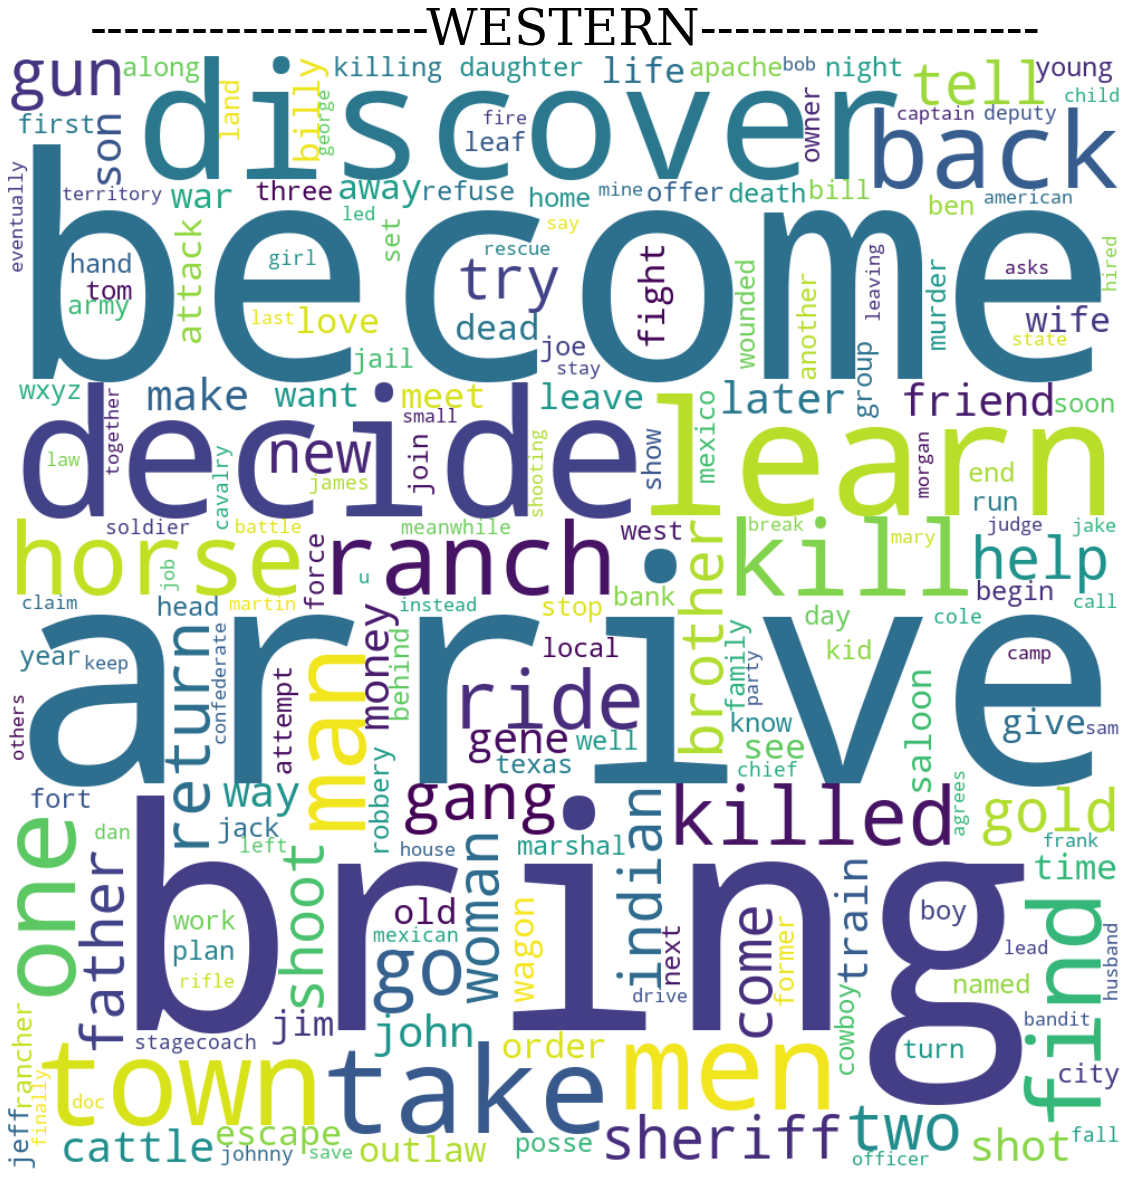

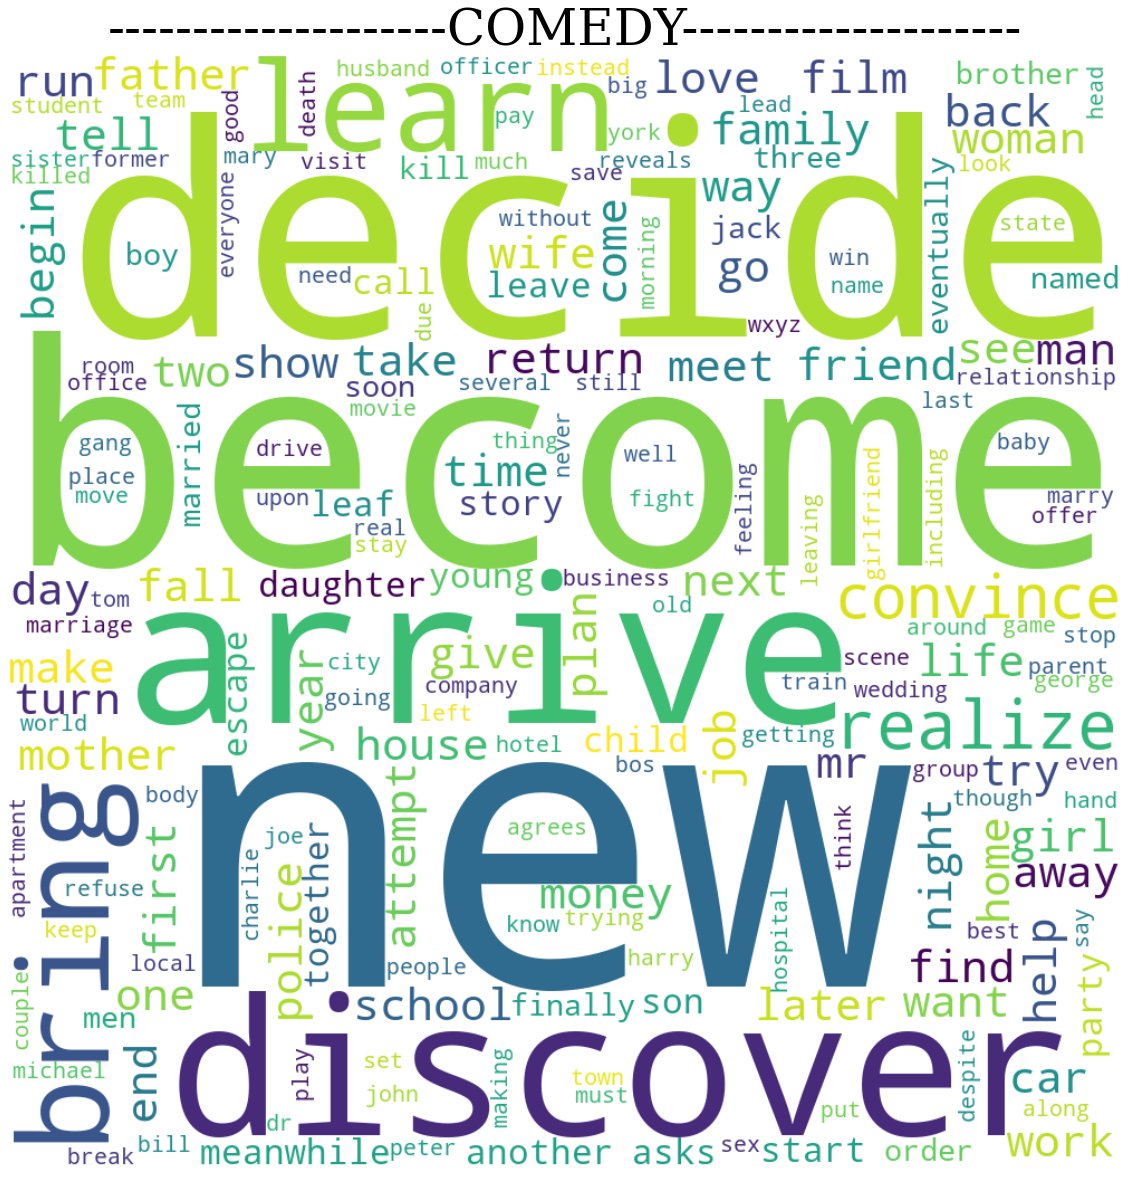

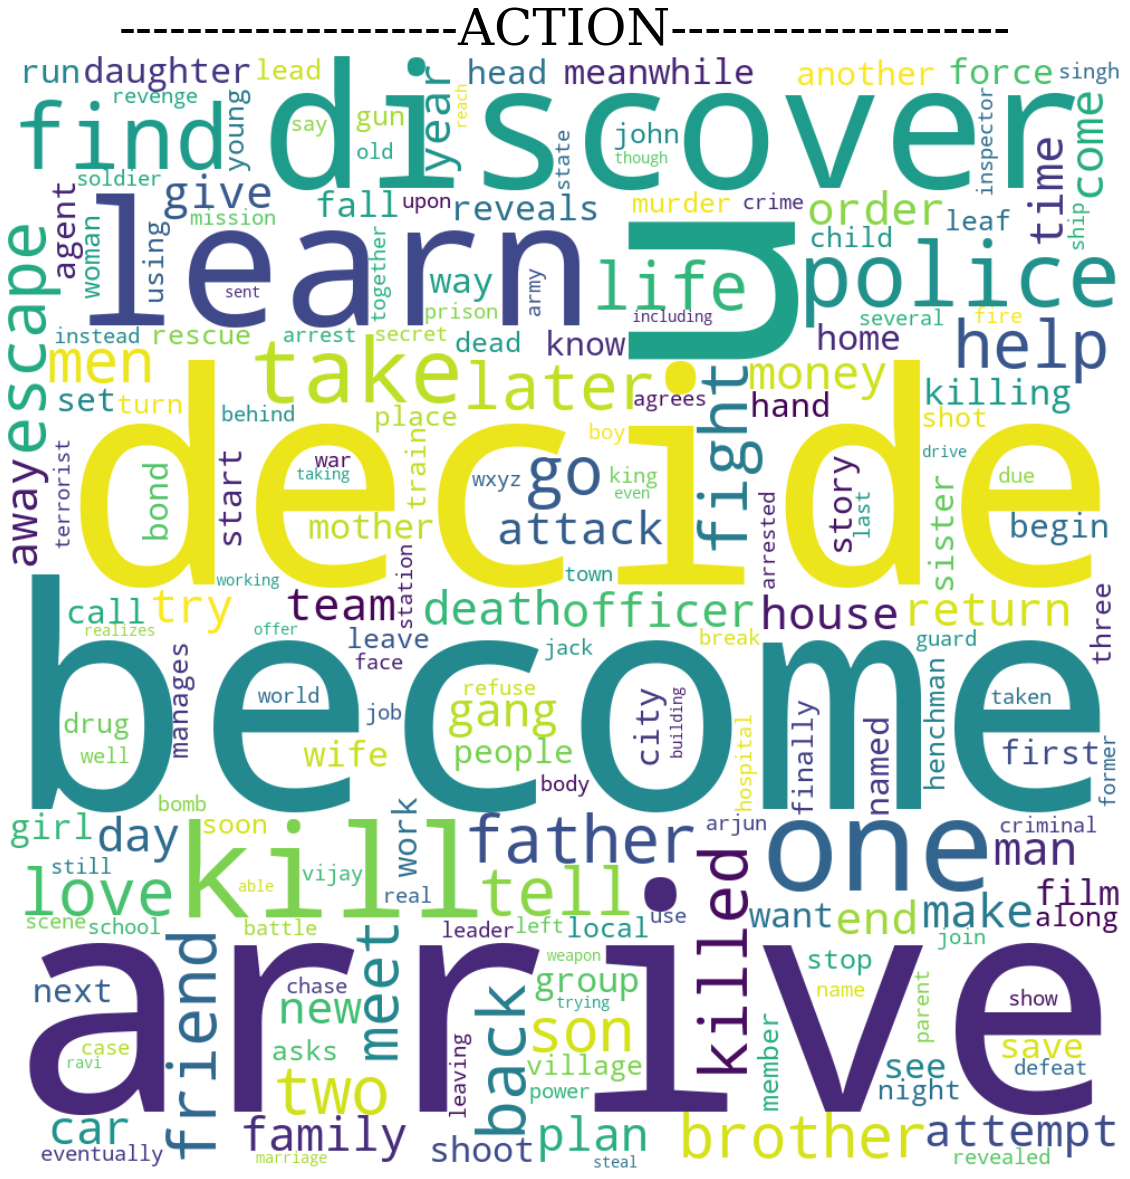

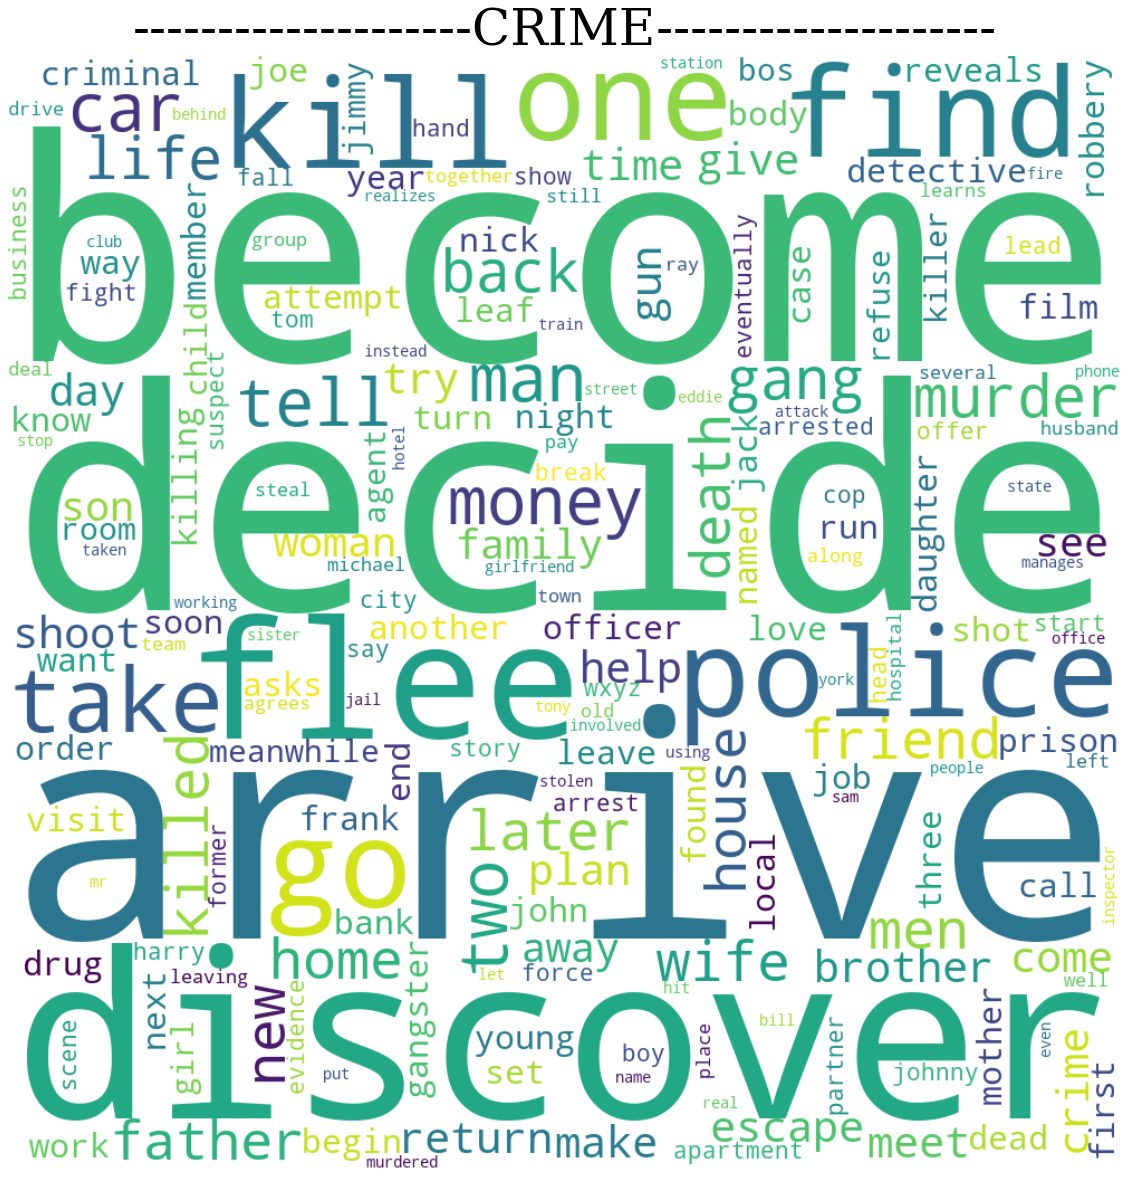

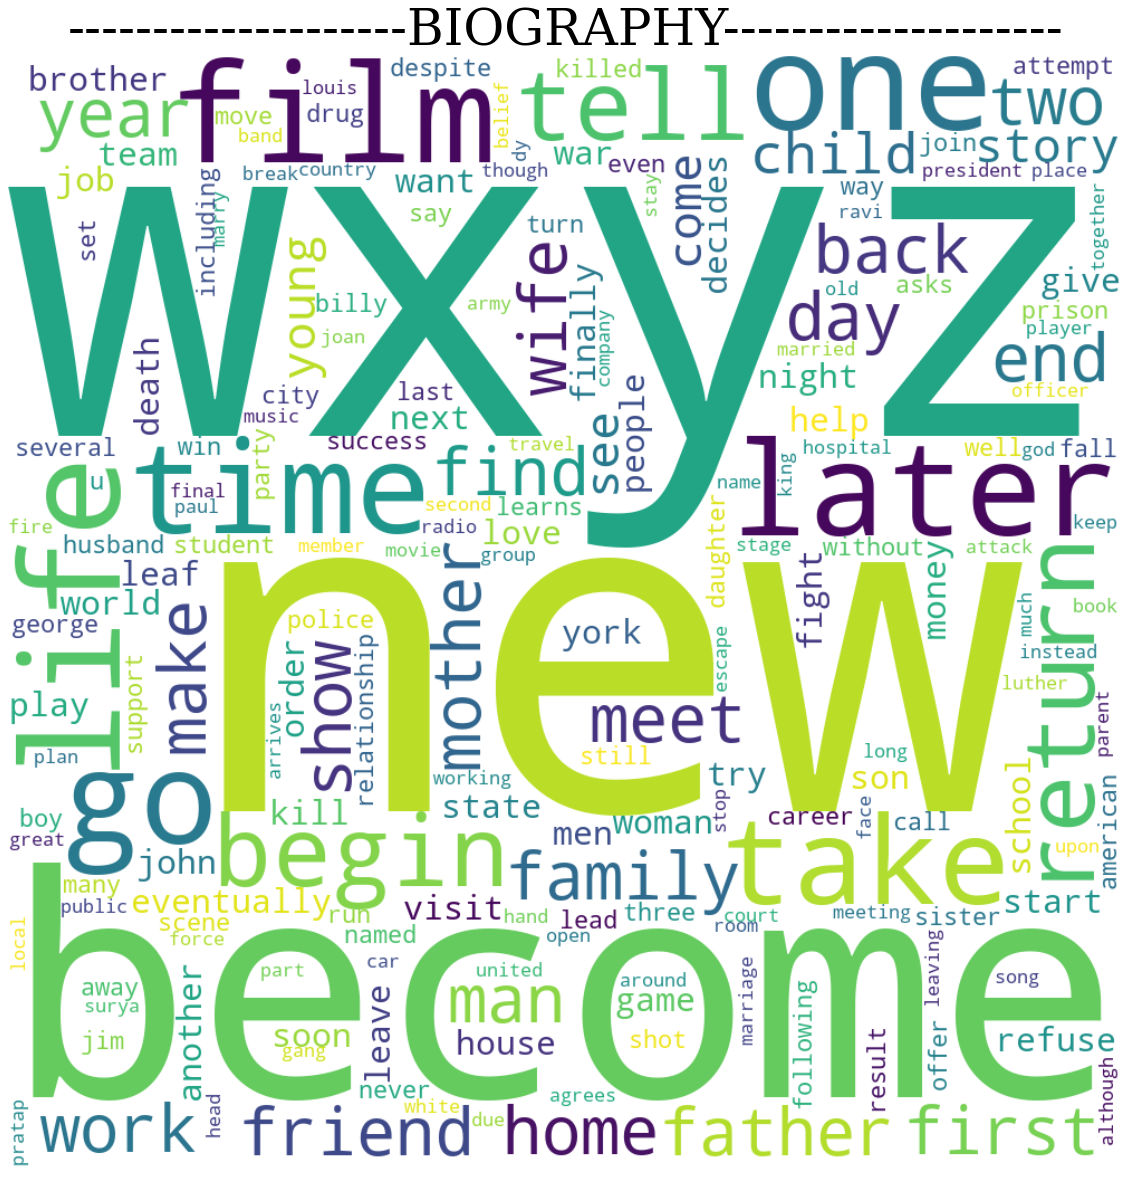

In [ ]:
font = {'family': 'serif',
            'weight': 'normal',
            'size': 50,
            }

for i in choices_final:
    
    word_cloud = WordCloud(width = 1000, height = 1000,background_color ='white').generate(" ".join(title for title in data[data['Genre']==i]['Words']))
    plt.figure(figsize = (20, 35), facecolor = None)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('-'*20+i.upper()+'-'*20,fontdict=font)
    plt.show()
    print('\n')